# Evaluation and Model Selection

##    - **Cross-Validation**: Techniques for assessing model performance.
##   - **Model Selection**: Choosing the best regression model for a specific problem.
##    - **Bias-Variance Tradeoff**: Understanding and managing bias and variance in regression models.

# Tutorial on Model Evaluation

## 1. Introduction
Evaluating machine learning models is crucial for determining their effectiveness and reliability in making accurate predictions. Proper evaluation helps understand the model's performance and identify areas for improvement.

### Importance of Model Evaluation
Model evaluation ensures that predictions made by machine learning models are accurate and reliable. It helps assess the model's ability to generalize to new data, thereby preventing overfitting and underfitting.

### Model Evaluation Role in Preventing Overfitting and Underfitting

#### Overfitting and Underfitting

Understanding overfitting and underfitting is crucial for developing robust machine learning models:

##### Overfitting

**Definition:** Overfitting occurs when a model learns the training data too well, capturing noise and details that do not generalize to new data.

**Indicators:**
- High accuracy on training data but poor performance on validation/test data.

**Impact on Evaluation:**
- An overfitted model will have misleadingly high training accuracy and low generalization ability. Evaluating on a separate validation or test set can reveal this discrepancy.

##### Underfitting

**Definition:** Underfitting happens when a model is too simple to capture the underlying patterns in the data.

**Indicators:**
- Poor performance on both training and validation/test data.

**Impact on Evaluation:**
- An underfitted model shows consistently low accuracy across both training and validation/test sets, indicating it has not learned the data well.



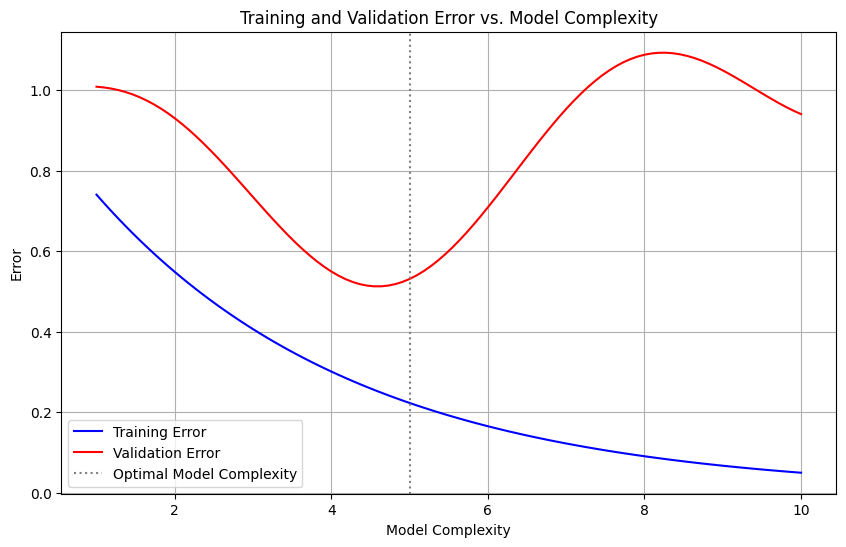

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
model_complexity = np.linspace(1, 10, 100)
training_error = np.exp(-0.3 * model_complexity)
validation_error = training_error + 0.2 * np.sin(model_complexity) + 0.1 * model_complexity

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the errors
plt.plot(model_complexity, training_error, label='Training Error', color='blue')
plt.plot(model_complexity, validation_error, label='Validation Error', color='red')

# Add labels and legend
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.title('Training and Validation Error vs. Model Complexity')
plt.axvline(x=5, color='gray', linestyle=':', label='Optimal Model Complexity')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


##### Relation to Model Evaluation

**Evaluation Metrics:**
- Metrics like accuracy, precision, recall, F1 score, AUC, and others should be compared across training and validation/test sets to detect overfitting or underfitting.

**Cross-Validation:**
- Techniques like K-Fold Cross-Validation help in assessing model performance more reliably, reducing the risk of overfitting or underfitting by ensuring the model is validated on multiple subsets of the data.

### Effectiveness and Reliability
- **Effectiveness**: Evaluating models helps measure how well a model performs its intended task. It involves checking if the model predictions are accurate and if it solves the problem it was designed for.
- **Reliability**: Reliability refers to the consistency of the model’s performance across different datasets and over time. A reliable model produces stable and consistent predictions even when the input data changes.

### Understanding Model Performance
- **Performance Metrics**: By using various performance metrics, we can quantify how well a model performs. These metrics provide insights into different aspects of the model's behavior, such as accuracy, precision, recall, and F1 score for classification models, or MAE, MSE, and R-squared for regression models.
- **Identifying Strengths and Weaknesses**: Model evaluation helps in pinpointing the strengths and weaknesses of a model. For instance, a model might have high accuracy but low recall, indicating that it misses many positive cases.

### Areas for Improvement
- **Hyperparameter Tuning**: Evaluation results can guide hyperparameter tuning, which involves adjusting the model parameters to improve performance.
- **Feature Engineering**: Insights from model evaluation can lead to better feature engineering, such as adding new features, removing irrelevant ones, or transforming existing features to enhance the model’s predictive power.
- **Algorithm Selection**: Evaluating different models helps in selecting the best algorithm for the given problem. For example, if a decision tree performs poorly, a random forest or gradient boosting model might be a better choice.

## Overview of the Tutorial
This tutorial provides a comprehensive guide to evaluating machine learning models, covering both basic and advanced concepts. Each method discussed will be implemented in Python to offer practical, hands-on experience.

### Basic Metrics
- **Accuracy**: Overall correctness of the model.
- **Precision**: Quality of positive predictions.
- **Recall (Sensitivity)**: Ability to identify positive instances.
- **F1 Score**: Balance between precision and recall.

### Advanced Metrics
- **ROC Curve and AUC**: Performance at various threshold settings.
- **Kappa Statistic**: Agreement between observed and expected accuracy.
- **Matthews Correlation Coefficient (MCC)**: Balanced performance measure for binary classifications.

### Validation Techniques
- **K-Fold Cross-Validation**: Divides data into k subsets for training and testing.
- **Stratified K-Fold Cross-Validation**: Ensures each fold has a representative distribution of classes.
- **Leave-One-Out Cross-Validation (LOOCV)**: Uses a single observation as the validation set and the rest as the training set.

### Case Studies
- **Real-world applications and examples of model evaluation.**

### Tools and Libraries
- **Scikit-Learn**: Comprehensive machine learning library.
- **Code Examples**: Practical implementation in Python.

By the end of this tutorial, you will be equipped with the knowledge and skills to evaluate machine learning models effectively, choose appropriate metrics, and apply these techniques using Python.

+++
### 2. Metrics for Classification Models

#### Confusion Matrix
A confusion matrix is a table used to evaluate the performance of a classification model. It provides a detailed breakdown of model predictions by showing the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

**Structure**:
```
               Predicted
                Positive    Negative
Actual  Positive    TP           FN
        Negative    FP           TN
```

- **True Positive (TP)**: Correctly predicted positive cases.
- **True Negative (TN)**: Correctly predicted negative cases.
- **False Positive (FP)**: Incorrectly predicted positive cases.
- **False Negative (FN)**: Incorrectly predicted negative cases.

**Scenario**:
Consider a binary classification model that predicts whether a transaction is fraudulent or not. For a small dataset of 5 transactions, the actual and predicted outcomes are as follows:
- Actual: [1, 0, 1, 0, 1]
- Predicted: [1, 0, 0, 0, 1]

**Python Example**:

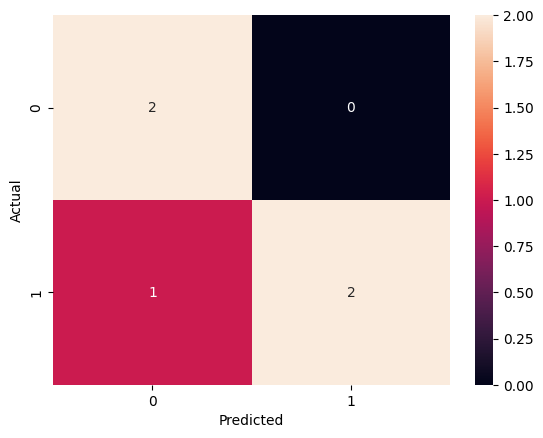

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Actual and predicted labels
y_true = [1, 0, 1, 0, 1]
y_pred = [1, 0, 0, 0, 1]

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Accuracy
**Definition**: Accuracy is the ratio of correctly predicted instances (both TP and TN) to the total instances. It measures the overall correctness of the model.

**Calculation**:

$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $

**Scenario**:
Using the confusion matrix from the previous scenario:
- TP = 2, TN = 2, FP = 0, FN = 1

**Python Example**:

In [3]:
from sklearn.metrics import accuracy_score

# Actual and predicted labels
y_true = [1, 0, 1, 0, 1]
y_pred = [1, 0, 0, 0, 1]

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8



#### Precision
**Definition**: Precision is the ratio of true positive predictions to the total predicted positives. It indicates the quality of positive predictions.

**Calculation**:

$ \text{Precision} = \frac{TP}{TP + FP} $

**Scenario**:
From the confusion matrix, precision is calculated with TP = 2 and FP = 0.

**Python Example:**

In [4]:
from sklearn.metrics import precision_score

# Actual and predicted labels
y_true = [1, 0, 1, 0, 1]
y_pred = [1, 0, 0, 0, 1]

# Calculate precision
precision = precision_score(y_true, y_pred)
print(f'Precision: {precision}')

Precision: 1.0


#### Recall (Sensitivity)
**Definition**: Recall is the ratio of true positive predictions to the actual positives. It measures the model’s ability to identify positive instances.

**Calculation**:
$ \text{Recall} = \frac{TP}{TP + FN} $

**Scenario**:
From the confusion matrix, recall is calculated with TP = 2 and FN = 1.

**Python Example**:

In [ ]:
from sklearn.metrics import recall_score

# Actual and predicted labels
y_true = [1, 0, 1, 0, 1]
y_pred = [1, 0, 0, 0, 1]

# Calculate recall
recall = recall_score(y_true, y_pred)
print(f'Recall: {recall}')

Recall: 0.6666666666666666


+++
#### F1 Score
**Definition**: The F1 Score is the harmonic mean of precision and recall. It balances these two metrics, making it particularly useful for evaluating models on imbalanced datasets.

**Calculation**:
$ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $

The harmonic mean is used rather than the arithmetic mean because it penalizes extreme values more, ensuring that the F1 Score is only high if both precision and recall are high.

**Pros**:
- **Balances Precision and Recall**: The F1 Score considers both false positives and false negatives, making it a good measure of model performance when the classes are imbalanced.
- **Useful for Imbalanced Datasets**: It provides a better measure of the incorrectly classified cases than accuracy.
- **Single Metric**: Combines two important metrics into one, simplifying model evaluation.

**Cons**:
- **Can Be Difficult to Interpret**: Since it combines precision and recall, it can sometimes be harder to understand what a high or low F1 Score means without additional context.
- **Does Not Differentiate Between Types of Errors**: The F1 Score treats false positives and false negatives equally, which may not always be desirable depending on the application.


  **Python Example**:


In [ ]:
from sklearn.metrics import f1_score

# Actual and predicted labels
y_true = [1, 0, 1, 0, 1]
y_pred = [1, 0, 0, 0, 1]

# Calculate F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')


F1 Score: 0.8


**Situations to Add More Weight to Recall or Precision**:
In certain scenarios, it may be more important to prioritize either recall or precision over the other:

- **Prioritizing Recall**: When the cost of false negatives is high, such as in medical diagnoses (e.g., detecting cancer), recall is more critical because missing a positive case can have severe consequences.
  
  **Weighted Example**:
  $ F_{\beta} \text{ Score} = (1 + \beta^2) \times \frac{\text{Precision} \times \text{Recall}}{(\beta^2 \times \text{Precision}) + \text{Recall}} $
  where $ \beta > 1 $ increases the weight of recall.

  **Python Example**:

In [ ]:
from sklearn.metrics import fbeta_score

  # Actual and predicted labels
y_true = [1, 0, 1, 0, 1]
y_pred = [1, 0, 0, 0, 1]

  # Calculate F2 score (more weight to recall)
f2 = fbeta_score(y_true, y_pred, beta=2)
print(f'F2 Score: {f2}')

F2 Score: 0.7142857142857142


- **Prioritizing Precision**: When the cost of false positives is high, such as in spam detection, precision is more critical because flagging a legitimate email as spam can be problematic.
  
  **Weighted Example**:
  $ F_{\beta} \text{ Score} = (1 + \beta^2) \times \frac{\text{Precision} \times \text{Recall}}{(\beta^2 \times \text{Precision}) + \text{Recall}} $
  where $ \beta < 1 $ increases the weight of precision.

  **Python Example**:

In [ ]:
from sklearn.metrics import fbeta_score

# Actual and predicted labels
y_true = [1, 0, 1, 0, 1]
y_pred = [1, 0, 0, 0, 1]

# Calculate F0.5 score (more weight to precision)
f05 = fbeta_score(y_true, y_pred, beta=0.5)
print(f'F0.5 Score: {f05}')

F0.5 Score: 0.9090909090909091



Understanding the F1 Score and how to adjust its balance with $ F_{\beta} $ Score allows for more nuanced evaluation of classification models, tailored to the specific needs of different applications.
+++

+++
### Multi-Class Classification Metrics

In multi-class classification, the metrics can be extended to handle multiple classes. The concepts of precision, recall, and F1 score are computed for each class separately, and then averaged in various ways. The commonly used averaging methods are:

- **Macro-Averaging**: Computes the metric independently for each class and then takes the average (treats all classes equally).
- **Micro-Averaging**: Aggregates the contributions of all classes to compute the average metric (gives more weight to larger classes).
- **Weighted-Averaging**: Computes the metric independently for each class, then takes the average weighted by the number of instances in each class (balances the influence of each class by its size).

Or the metrics can be computed seperately for each class, This means calculating confusion matrix, precision, recall, and F1 score for each class individually.
Here is an example of how to compute these metrics in a multi-class setting using Python:

**Scenario**:
Suppose we have a multi-class classification problem with three classes: 0, 1, and 2. We have a dataset with actual and predicted labels as follows:

- Actual: [0, 1, 2, 0, 1, 2]
- Predicted: [0, 2, 1, 0, 0, 1]

**Python Example**:

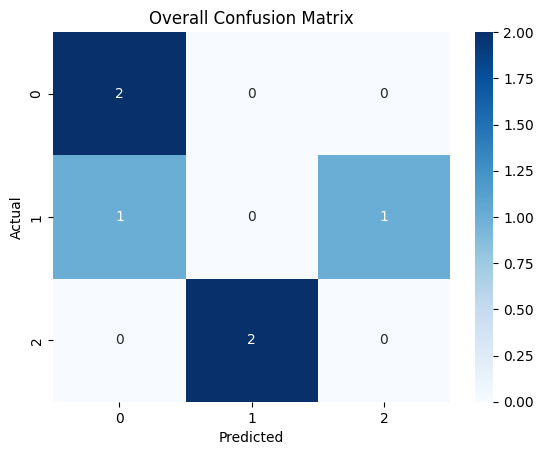

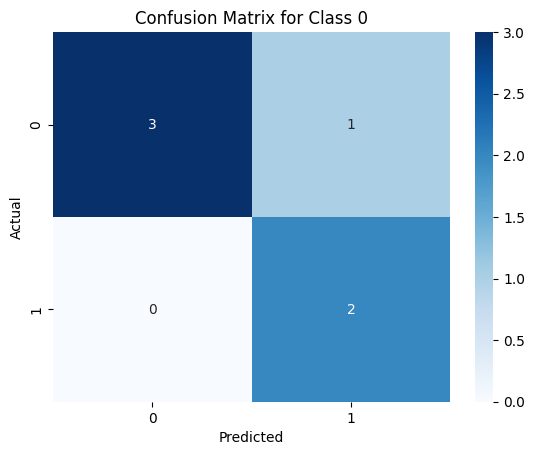

Precision for Class 0: 0.6666666666666666
Recall for Class 0: 1.0
F1 Score for Class 0: 0.8



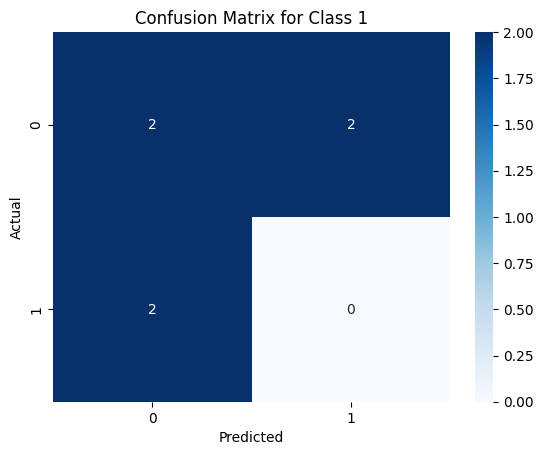

Precision for Class 1: 0.0
Recall for Class 1: 0.0
F1 Score for Class 1: 0.0



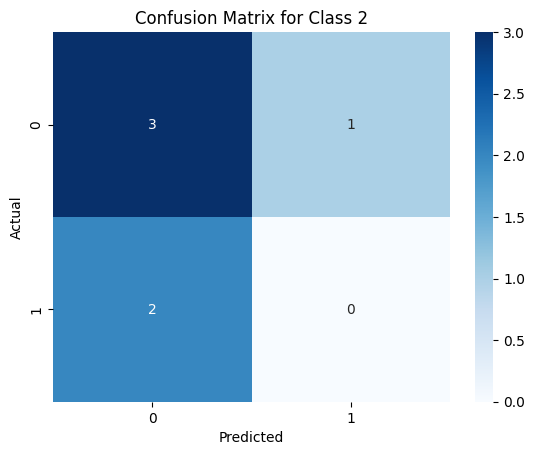

Precision for Class 2: 0.0
Recall for Class 2: 0.0
F1 Score for Class 2: 0.0

Precision (Macro): 0.2222222222222222
Recall (Macro): 0.3333333333333333
F1 Score (Macro): 0.26666666666666666
Precision (Micro): 0.3333333333333333
Recall (Micro): 0.3333333333333333
F1 Score (Micro): 0.3333333333333333
Precision (Weighted): 0.2222222222222222
Recall (Weighted): 0.3333333333333333
F1 Score (Weighted): 0.26666666666666666


In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Actual and predicted labels
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

# Generate and visualize overall confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Overall Confusion Matrix')
plt.show()

# Calculate and visualize confusion matrix for each class
for i in range(3):
    y_true_bin = [1 if x == i else 0 for x in y_true]
    y_pred_bin = [1 if x == i else 0 for x in y_pred]

    cm_class = confusion_matrix(y_true_bin, y_pred_bin)

    plt.figure()
    sns.heatmap(cm_class, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Class {i}')
    plt.show()

    precision = precision_score(y_true_bin, y_pred_bin)
    recall = recall_score(y_true_bin, y_pred_bin)
    f1 = f1_score(y_true_bin, y_pred_bin)

    print(f'Precision for Class {i}: {precision}')
    print(f'Recall for Class {i}: {recall}')
    print(f'F1 Score for Class {i}: {f1}\n')

# Calculate overall metrics
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

precision_micro = precision_score(y_true, y_pred, average='micro')
recall_micro = recall_score(y_true, y_pred, average='micro')
f1_micro = f1_score(y_true, y_pred, average='micro')

precision_weighted = precision_score(y_true, y_pred, average='weighted')
recall_weighted = recall_score(y_true, y_pred, average='weighted')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print(f'Precision (Macro): {precision_macro}')
print(f'Recall (Macro): {recall_macro}')
print(f'F1 Score (Macro): {f1_macro}')
print(f'Precision (Micro): {precision_micro}')
print(f'Recall (Micro): {recall_micro}')
print(f'F1 Score (Micro): {f1_micro}')
print(f'Precision (Weighted): {precision_weighted}')
print(f'Recall (Weighted): {recall_weighted}')
print(f'F1 Score (Weighted): {f1_weighted}')



These metrics are fundamental for evaluating classification models. They provide insights into different aspects of the model's performance, helping to identify strengths and weaknesses. Understanding and calculating these metrics are essential skills for anyone working with machine learning models.
+++